In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Experiment 1 Noise

In [2]:
df = pd.read_csv('experiment_1_noise_result.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_1_noise_result.csv'

In [10]:
grouped_df = df.groupby(by=['dataset_name', 'algo']).aggregate('mean').reset_index()
grouped_df

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index
0,medium_no_issue_no_noise,cam,0.0,0.475801,0.607658,0.804557,29.2,14.2,7.6,7.4,45.2,38.6,155.579762,3.0
1,medium_no_issue_no_noise,notears,0.0,0.593513,0.485399,1.042323,38.0,18.4,10.0,9.6,47.0,38.6,17.209467,3.0
2,medium_no_issue_noise,cam,0.0,0.539165,0.547932,0.926751,33.4,15.8,8.4,9.2,46.0,38.6,161.406758,3.0
3,medium_no_issue_noise,notears,0.0,0.626619,0.409122,0.988114,40.2,17.6,13.4,9.2,42.8,38.6,16.427167,3.0


In [11]:
grouped_df[grouped_df['dataset_name']=='medium_all']

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index


In [12]:
melt_rate_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['fdr', 'tpr', 'fpr'], value_name='rate', var_name='measurement')
melt_rate_df.head()

,dataset_name,algo,dataset_index,measurement,rate
0,medium_no_issue_no_noise,cam,3.0,fdr,0.475801
1,medium_no_issue_no_noise,notears,3.0,fdr,0.593513
2,medium_no_issue_noise,cam,3.0,fdr,0.539165
3,medium_no_issue_noise,notears,3.0,fdr,0.626619
4,medium_no_issue_no_noise,cam,3.0,tpr,0.607658


In [13]:
melt_abs_err_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['shd', 'false_pos', 'false_neg', 'reserved_edges', 'pred_size', 'true_size'], value_name='value', var_name='measurement')
melt_abs_err_df.head()

,dataset_name,algo,dataset_index,measurement,value
0,medium_no_issue_no_noise,cam,3.0,shd,29.2
1,medium_no_issue_no_noise,notears,3.0,shd,38.0
2,medium_no_issue_noise,cam,3.0,shd,33.4
3,medium_no_issue_noise,notears,3.0,shd,40.2
4,medium_no_issue_no_noise,cam,3.0,false_pos,14.2


In [14]:
melt_time_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['timing'], value_name='seconds', var_name='measurement')
melt_time_df.head()


,dataset_name,algo,dataset_index,measurement,seconds
0,medium_no_issue_no_noise,cam,3.0,timing,155.579762
1,medium_no_issue_no_noise,notears,3.0,timing,17.209467
2,medium_no_issue_noise,cam,3.0,timing,161.406758
3,medium_no_issue_noise,notears,3.0,timing,16.427167


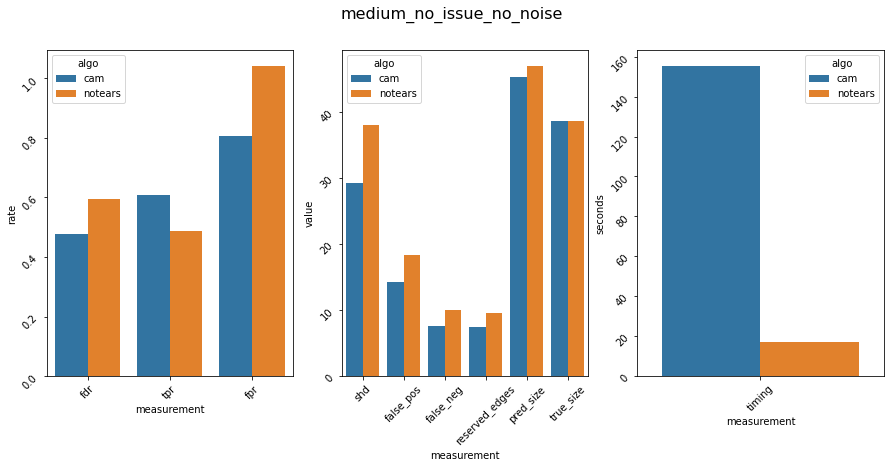

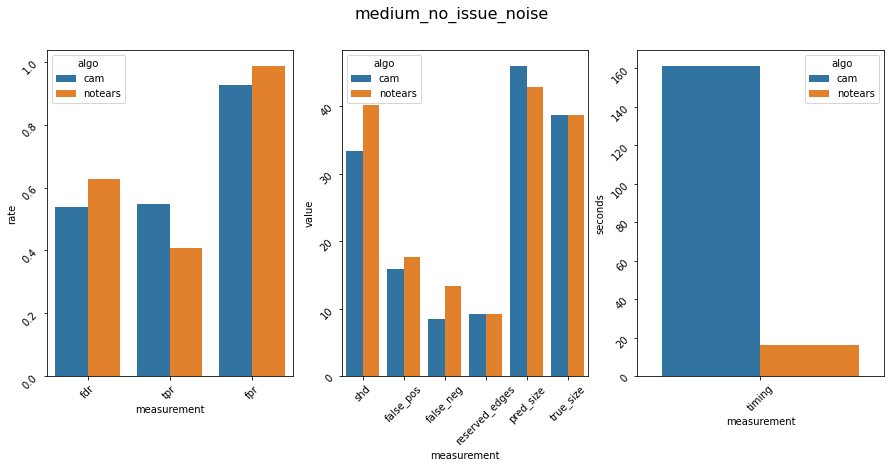

In [15]:
for dataset in melt_rate_df['dataset_name'].unique():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
    sns.barplot(ax=ax1, y='rate', x='measurement',data=melt_rate_df[melt_rate_df['dataset_name']==dataset], hue='algo')
    sns.barplot(ax=ax2, y='value', x='measurement',data=melt_abs_err_df[melt_abs_err_df['dataset_name']==dataset], hue='algo')
    sns.barplot(ax=ax3, y='seconds', x='measurement',data=melt_time_df[melt_time_df['dataset_name']==dataset], hue='algo')
    ax1.tick_params(labelrotation=45)
    ax2.tick_params(labelrotation=45)
    ax3.tick_params(labelrotation=45)
    fig.suptitle(dataset, fontsize=16)
    plt.show()

# Experiment 1 variation

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('experiment_1_variation_edro\experiment_1_variation_edro_result.csv')
df

,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,causal_mech,dataset,dataset_name,dataset_index,algo
0,0,0.750000,0.050000,0.375000,22,3,19,0,4,20,2.308033,linear_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,gran_dag
1,0,1.000000,0.000000,0.250000,22,2,20,0,2,20,3418.127263,linear_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,dag_gnn
2,0,0.520000,0.600000,1.625000,16,8,3,5,25,20,22.863833,linear_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,cam
3,0,0.416667,0.350000,0.625000,17,4,12,1,12,20,1.410600,linear_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,notears
4,0,1.000000,0.000000,0.500000,22,4,20,0,4,20,1523.371819,linear_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,rl_bic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1.000000,0.000000,0.071429,15,1,14,0,1,14,3832.291709,linear_mechanism,medium_no_issue_noise_2,medium_no_issue_noise,2,dag_gnn
102,0,0.625000,0.642857,1.071429,16,11,1,4,24,14,21.481797,linear_mechanism,medium_no_issue_noise_2,medium_no_issue_noise,2,cam
103,0,1.000000,0.000000,0.142857,15,1,13,1,2,14,0.810882,linear_mechanism,medium_no_issue_noise_2,medium_no_issue_noise,2,notears
104,0,1.000000,0.000000,0.071429,15,1,14,0,1,14,1561.134302,linear_mechanism,medium_no_issue_noise_2,medium_no_issue_noise,2,rl_bic


In [9]:
grouped_df = df.groupby(by=['dataset_name', 'algo']).aggregate('mean').reset_index()
grouped_df

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index
0,medium_all,cam,0.0,0.545455,0.649920,0.957516,14.333333,8.666667,2.666667,3.000000,21.333333,15.333333,16.375973,2.0
1,medium_all,dag_gnn,0.0,1.000000,0.000000,0.176471,14.000000,3.000000,11.000000,0.000000,3.000000,11.000000,3608.244885,2.0
2,medium_all,gran_dag,0.0,0.777778,0.202652,0.293573,16.333333,3.333333,12.333333,0.666667,6.333333,15.333333,2.279759,2.0
3,medium_all,notears,0.0,0.775758,0.206041,0.864924,20.666667,8.333333,10.000000,2.333333,13.666667,15.333333,1.327539,2.0
4,medium_all,rl_bic,0.0,1.000000,0.000000,0.577342,19.000000,6.333333,14.666667,0.666667,7.000000,15.333333,1508.720271,2.0
5,medium_all,sam,0.0,0.633700,0.249103,0.453159,17.000000,5.333333,11.666667,0.333333,9.000000,15.333333,2872.564305,2.0
6,medium_confounder,cam,0.0,0.736849,0.510250,1.341578,19.333333,12.333333,1.000000,6.000000,24.666667,13.333333,23.124455,2.0
7,medium_confounder,dag_gnn,0.0,0.666667,0.000000,0.061275,14.333333,1.000000,13.333333,0.000000,1.000000,13.333333,3908.911751,2.0
8,medium_confounder,gran_dag,0.0,0.842593,0.066993,0.294229,15.333333,3.000000,11.666667,0.666667,4.666667,13.333333,2.301722,2.0
9,medium_confounder,notears,0.0,0.569264,0.338532,0.415664,14.000000,5.000000,7.666667,1.333333,10.666667,13.333333,1.321376,2.0


In [10]:
grouped_df[grouped_df['dataset_name']=='medium_all']

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index
0,medium_all,cam,0.0,0.545455,0.649920,0.957516,14.333333,8.666667,2.666667,3.000000,21.333333,15.333333,16.375973,2.0
1,medium_all,dag_gnn,0.0,1.000000,0.000000,0.176471,14.000000,3.000000,11.000000,0.000000,3.000000,11.000000,3608.244885,2.0
2,medium_all,gran_dag,0.0,0.777778,0.202652,0.293573,16.333333,3.333333,12.333333,0.666667,6.333333,15.333333,2.279759,2.0
3,medium_all,notears,0.0,0.775758,0.206041,0.864924,20.666667,8.333333,10.000000,2.333333,13.666667,15.333333,1.327539,2.0
4,medium_all,rl_bic,0.0,1.000000,0.000000,0.577342,19.000000,6.333333,14.666667,0.666667,7.000000,15.333333,1508.720271,2.0
5,medium_all,sam,0.0,0.633700,0.249103,0.453159,17.000000,5.333333,11.666667,0.333333,9.000000,15.333333,2872.564305,2.0


In [11]:
melt_rate_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['fdr', 'tpr', 'fpr'], value_name='rate', var_name='measurement')
melt_rate_df.head()

,dataset_name,algo,dataset_index,measurement,rate
0,medium_all,cam,2.0,fdr,0.545455
1,medium_all,dag_gnn,2.0,fdr,1.000000
2,medium_all,gran_dag,2.0,fdr,0.777778
3,medium_all,notears,2.0,fdr,0.775758
4,medium_all,rl_bic,2.0,fdr,1.000000


In [12]:
melt_abs_err_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['shd', 'false_pos', 'false_neg', 'reserved_edges', 'pred_size', 'true_size'], value_name='value', var_name='measurement')
melt_abs_err_df.head()

,dataset_name,algo,dataset_index,measurement,value
0,medium_all,cam,2.0,shd,14.333333
1,medium_all,dag_gnn,2.0,shd,14.000000
2,medium_all,gran_dag,2.0,shd,16.333333
3,medium_all,notears,2.0,shd,20.666667
4,medium_all,rl_bic,2.0,shd,19.000000


In [13]:
melt_time_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['timing'], value_name='seconds', var_name='measurement')
melt_time_df.head()


,dataset_name,algo,dataset_index,measurement,seconds
0,medium_all,cam,2.0,timing,16.375973
1,medium_all,dag_gnn,2.0,timing,3608.244885
2,medium_all,gran_dag,2.0,timing,2.279759
3,medium_all,notears,2.0,timing,1.327539
4,medium_all,rl_bic,2.0,timing,1508.720271


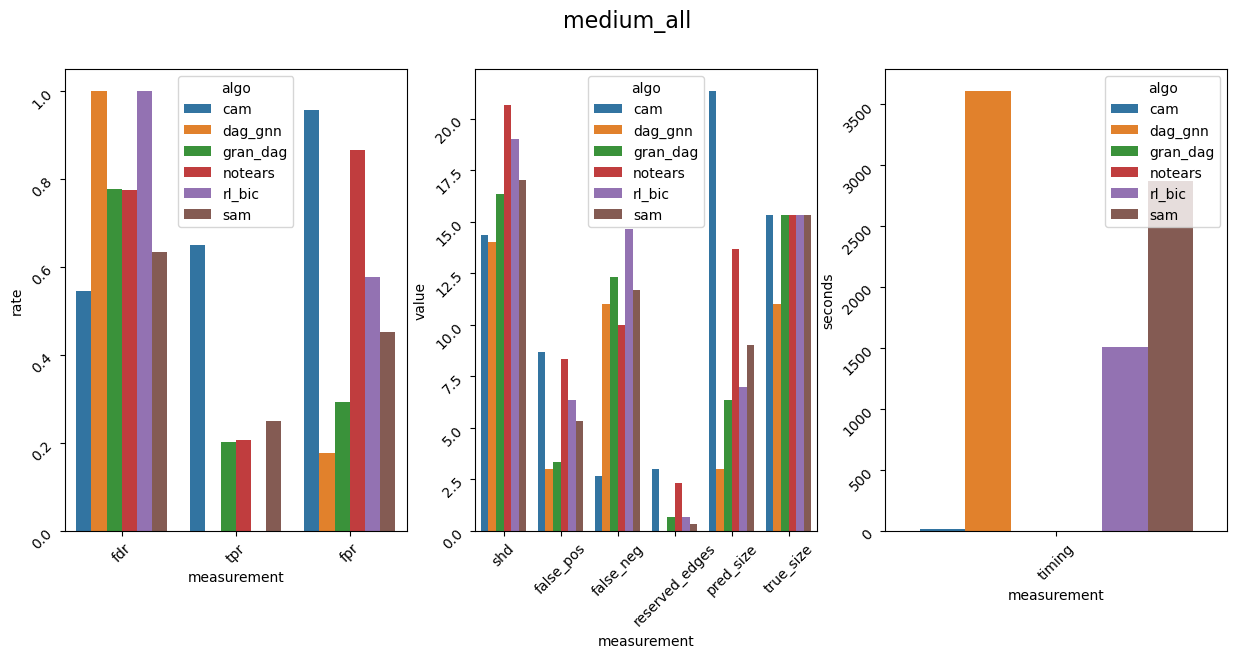

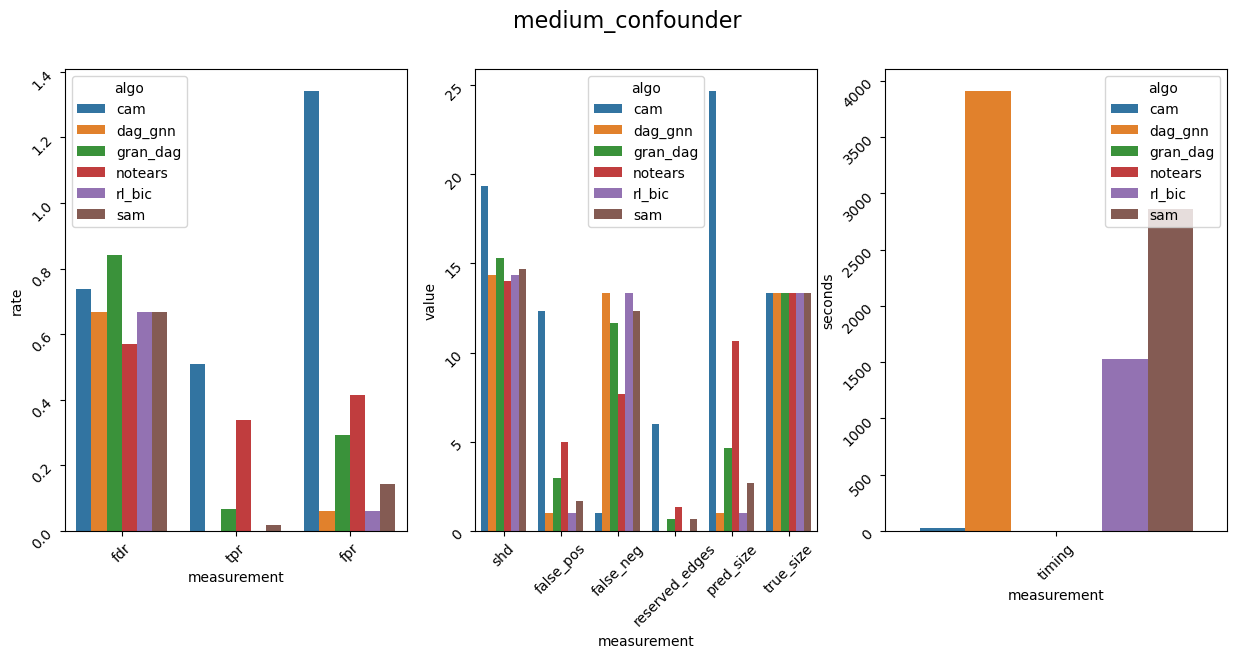

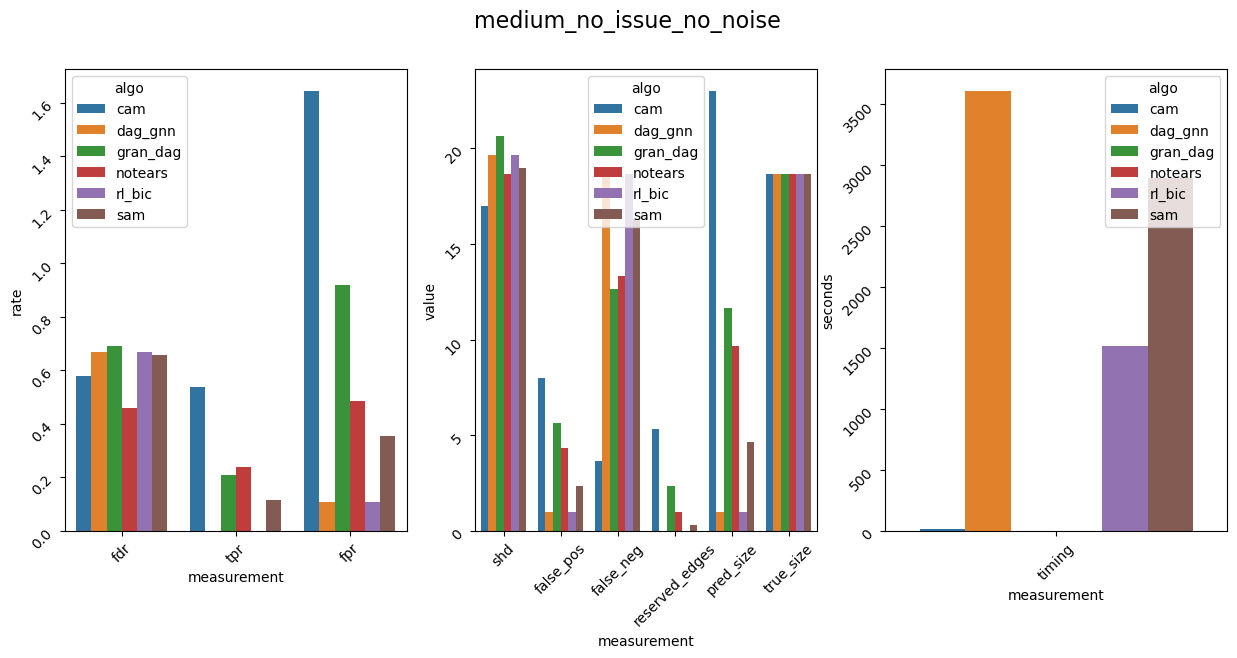

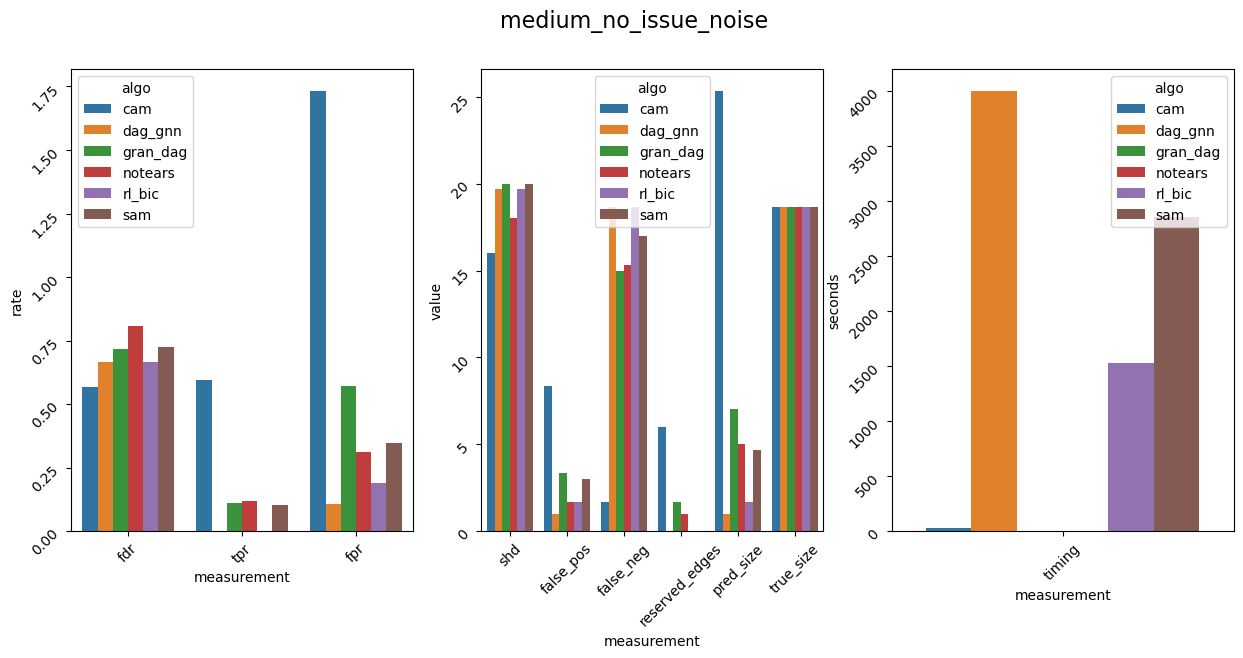

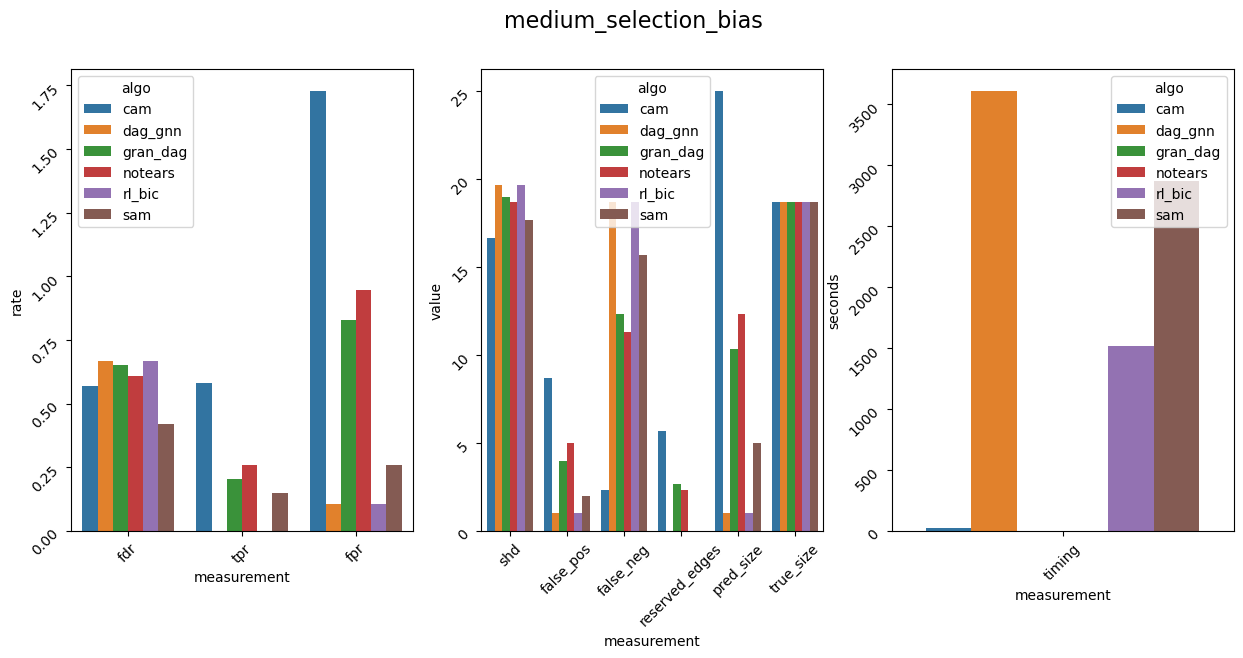

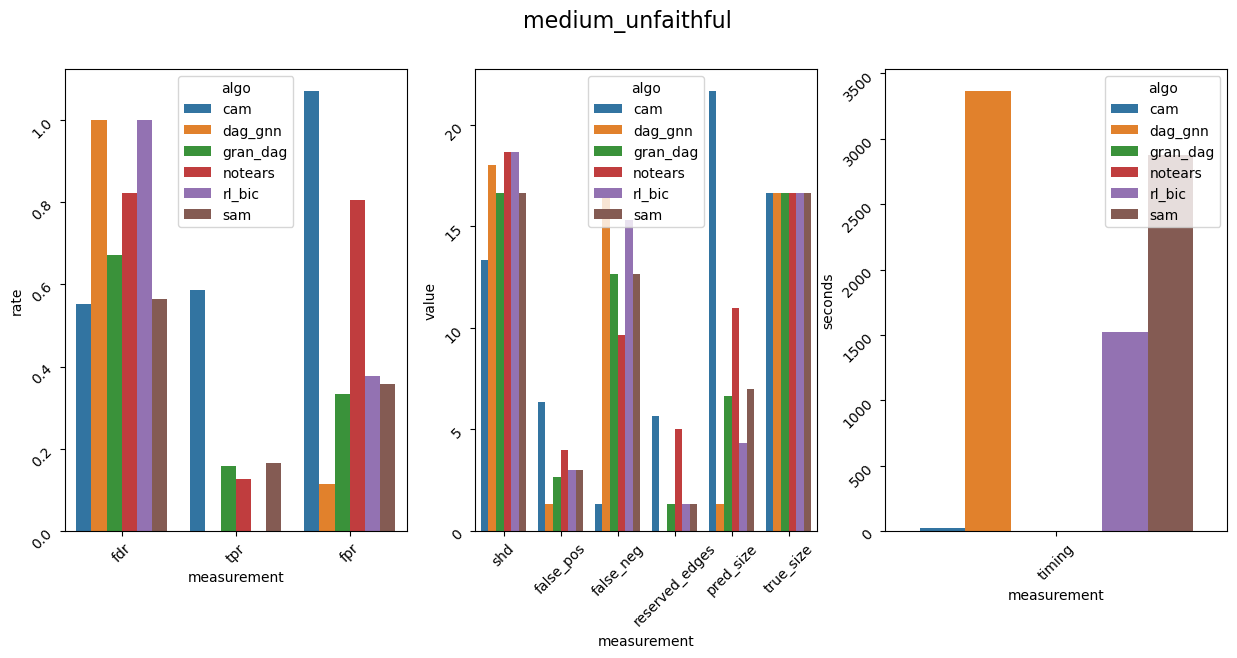

In [16]:
for dataset in melt_rate_df['dataset_name'].unique():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
    sns.barplot(ax=ax1, y='rate', x='measurement',data=melt_rate_df[melt_rate_df['dataset_name']==dataset], hue='algo')
    sns.barplot(ax=ax2, y='value', x='measurement',data=melt_abs_err_df[melt_abs_err_df['dataset_name']==dataset], hue='algo')
    sns.barplot(ax=ax3, y='seconds', x='measurement',data=melt_time_df[melt_time_df['dataset_name']==dataset], hue='algo')
    ax1.tick_params(labelrotation=45)
    ax2.tick_params(labelrotation=45)
    ax3.tick_params(labelrotation=45)
    fig.suptitle(dataset, fontsize=16)
    plt.show()

# Check data

In [17]:
import pandas as pd
import cdt
import networkx as nx
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure
from causalnex.structure.notears import from_pandas, from_numpy
from IPython.display import Image
import numpy as np
import os 
cdt.SETTINGS.rpath = 'C:\Program Files\R\R-4.2.1\\bin\Rscript' # path to your r executable
cdt.SETTINGS.rpath

'C:\\Program Files\\R\\R-4.2.1\\bin\\Rscript'

In [27]:
DATA_DIR = "experiment_1_variation_edro/data/linear_mechanism"

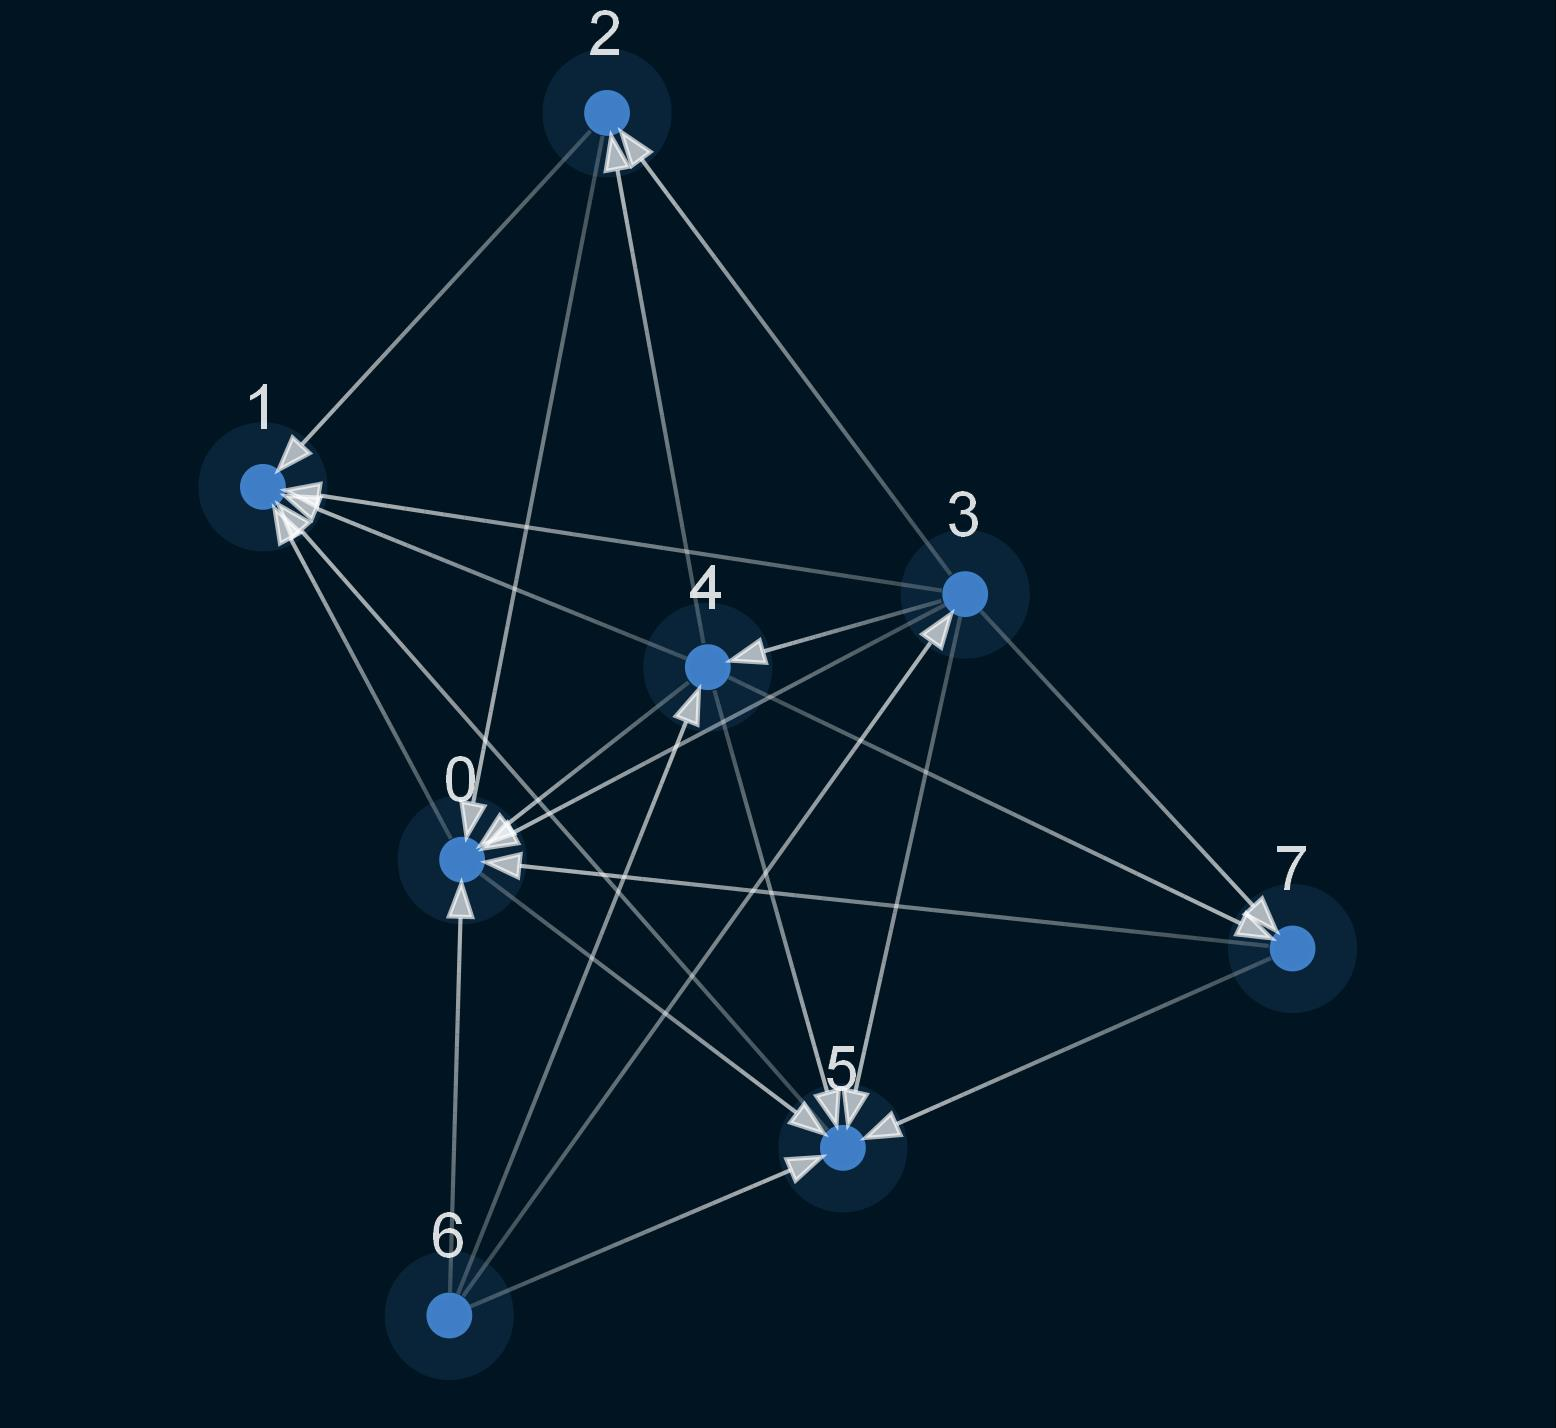

In [28]:
adjacency = np.load(DATA_DIR+"/medium_no_issue_no_noise_1/DAG1.npy")
data = np.load(DATA_DIR+"/medium_no_issue_no_noise_1/data1.npy")

graph = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)
e = list(graph.edges())
causal_nex_graph = StructureModel(e)
viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
image_binary = viz.draw(format="jpg")
Image(image_binary, height=400) 

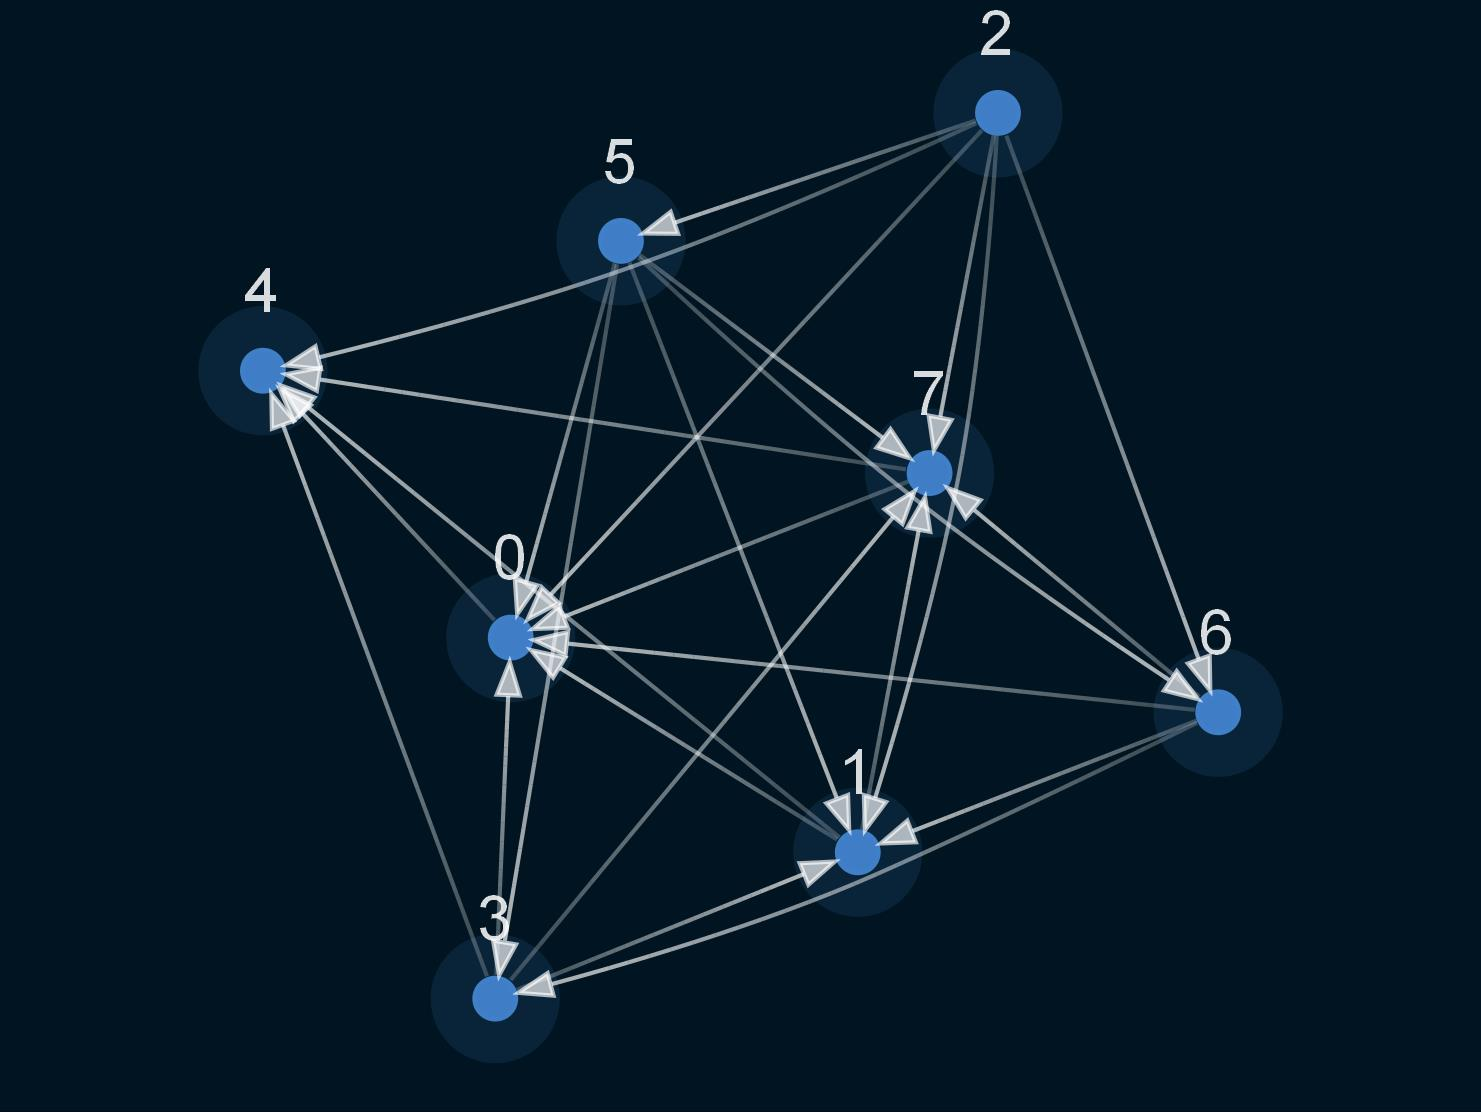

In [33]:
DATA_DIR = "experiment_1_variation_edro/results/linear_mechanism/"
adjacency = np.load(DATA_DIR+"/medium_no_issue_no_noise_1/cam/result.npy")
# data = np.load(DATA_DIR+"/medium_no_issue_no_noise_1/data1.npy")

graph = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)
e = list(graph.edges())
causal_nex_graph = StructureModel(e)
viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
image_binary = viz.draw(format="jpg")
Image(image_binary, height=400) 